In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import os
import tensorflow as tf
from lib.methods import *
from lib.models import *
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import preprocessing
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import image_dataset_from_directory

2022-12-17 11:40:50.788125: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-12-17 11:40:54.589003: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-12-17 11:40:54.665797: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6705GHz coreCount: 28 deviceMemorySize: 10.91GiB deviceMemoryBandwidth: 451.17GiB/s
2022-12-17 11:40:54.666230: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:81:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6705GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-12-17 11:40:54.666275: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic libra

# Loading SIPI Dataset

SIPI dataset was preprocessed using prepare_dataset notebook, so these three folders already contain Detritus/Non-Detritus images.

Training: 70%
Validation: 15%
Testing: 15%

In [2]:
DatasetName = '../../Detritus/Dataset-Detritus-Bubble'

train_dir = DatasetName+'/train'
validation_dir =  DatasetName+'/val'
test_dir = DatasetName+'/test'

test_all_class_dir = '../../Detritus/Dataset-Detritus-Bubble/test'
train_all_class_dir = 'Dataset-Detritus-Bubble/train'
val_all_class_dir = 'Dataset-Detritus-Bubble/val'

In [3]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

The three datasets are loaded using keras preprocessing method *image_dataset_from_directory*. Both the batch size and the image size hyperparameters where tested using different values. 

In [4]:
train_dataset = image_dataset_from_directory(train_dir,
shuffle=True,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

Found 38391 files belonging to 2 classes.


In [5]:
validation_dataset = image_dataset_from_directory(validation_dir,
shuffle=True,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

test_dataset = image_dataset_from_directory(test_dir,
shuffle=True,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

Found 8226 files belonging to 2 classes.
Found 8227 files belonging to 2 classes.


In [6]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(test_all_class_dir,
shuffle=False,
batch_size=BATCH_SIZE)

Found 8227 images belonging to 2 classes.


# Custom CNN model

Training with Data Augmentation

2022-12-17 11:42:42.613672: W tensorflow/core/util/tensor_slice_reader.cc:95] Could not open .model_a: Data loss: file is too short to be an sstable: perhaps your file is in a different file format and you need to use a different restore operator?
2022-12-17 11:42:42.891764: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-12-17 11:42:42.913039: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2100035000 Hz
2022-12-17 11:42:43.031407: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-12-17 11:42:43.500316: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8302


 16/258 [>.............................] - ETA: 2s - loss: 0.1388 - accuracy: 0.9434

2022-12-17 11:42:44.082610: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-12-17 11:42:44.083425: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


258/258 [==============================] - 5s 12ms/step - loss: 0.1574 - accuracy: 0.9392
Test accuracy : 0.9392244815826416


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.005s...
[t-SNE] Computed neighbors for 8227 samples in 2.283s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 3.110095
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.053703
[t-SNE] KL divergence after 2500 iterations: 2.064700


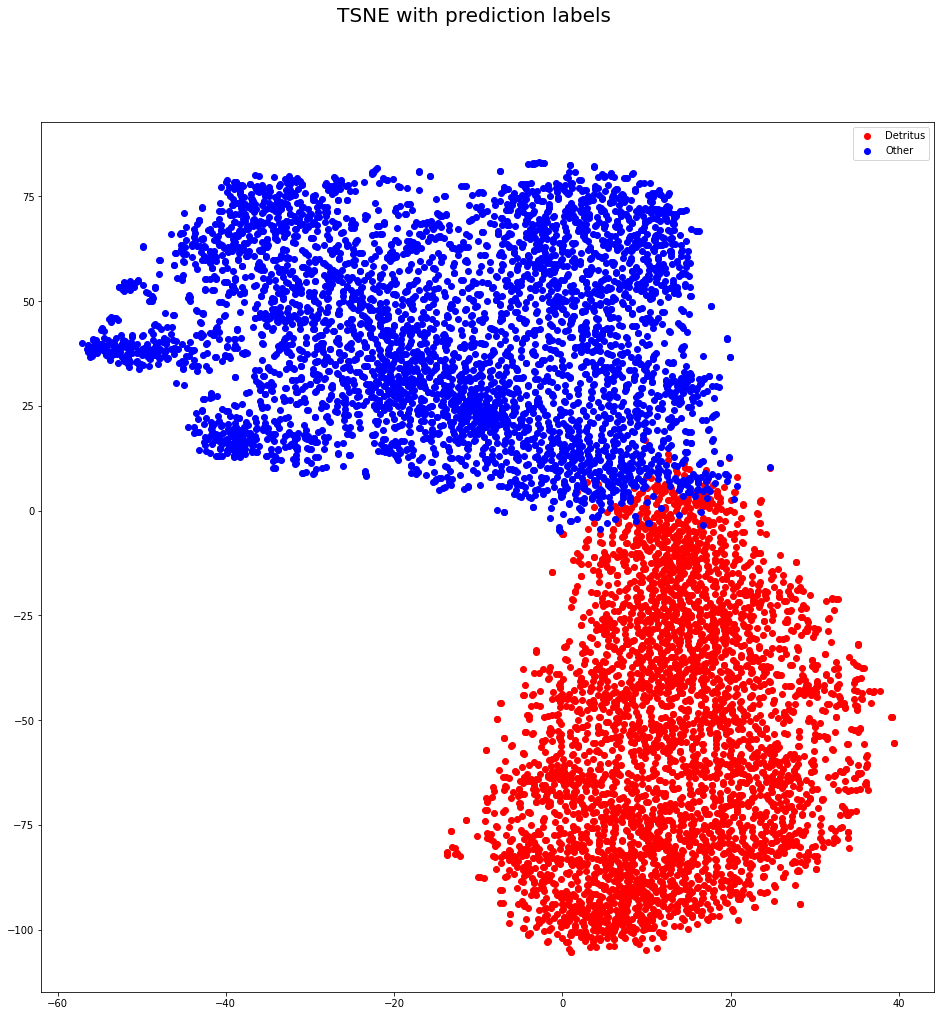

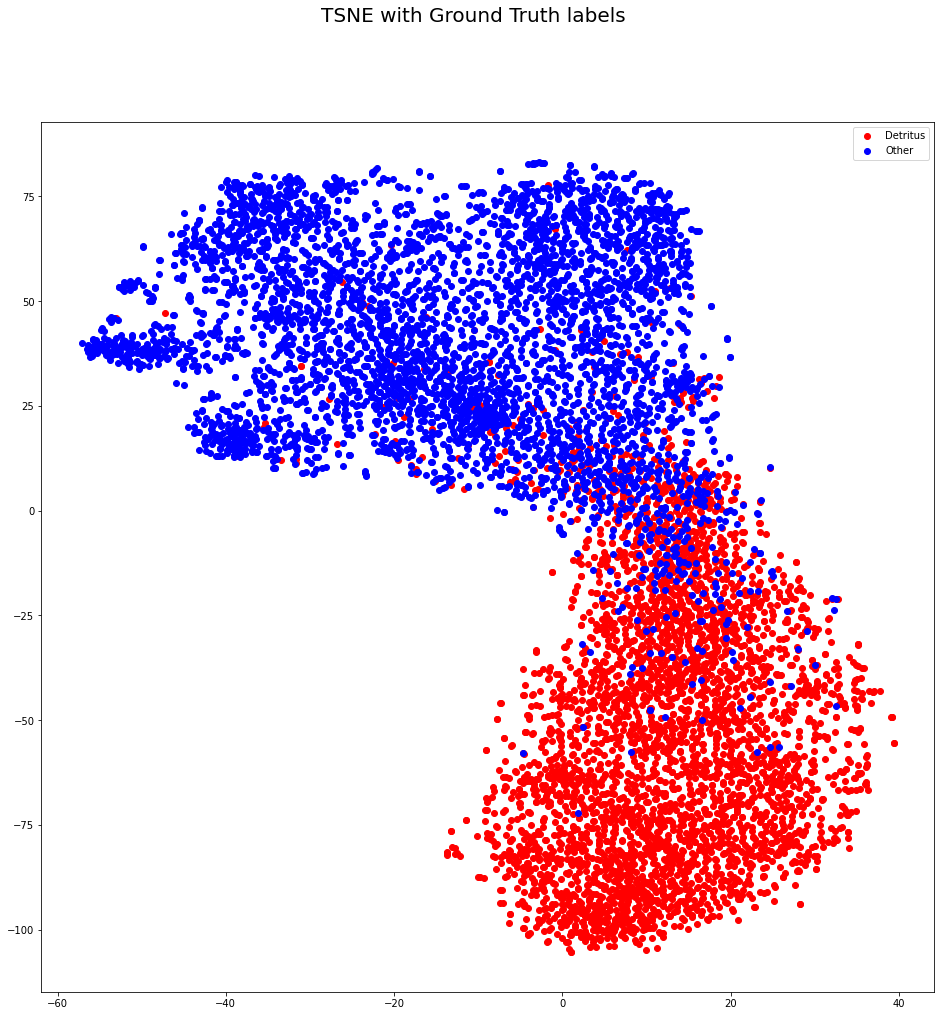

In [9]:
model_A = get_model_A(0.0, True, 0.0)

lr = 0.001
model_A.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_A.load_weights('.model_a')

test_accuracy(model_A, test_dataset)
print_tsne(model_A, test_dataset, 2500)


2022-12-17 11:44:02.162954: W tensorflow/core/util/tensor_slice_reader.cc:95] Could not open .model_b: Data loss: file is too short to be an sstable: perhaps your file is in a different file format and you need to use a different restore operator?


258/258 [==============================] - 3s 11ms/step - loss: 0.1408 - accuracy: 0.9435
Test accuracy : 0.9434787631034851


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.001s...
[t-SNE] Computed neighbors for 8227 samples in 1.924s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 2.244415
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.952431
[t-SNE] KL divergence after 2500 iterations: 1.752583


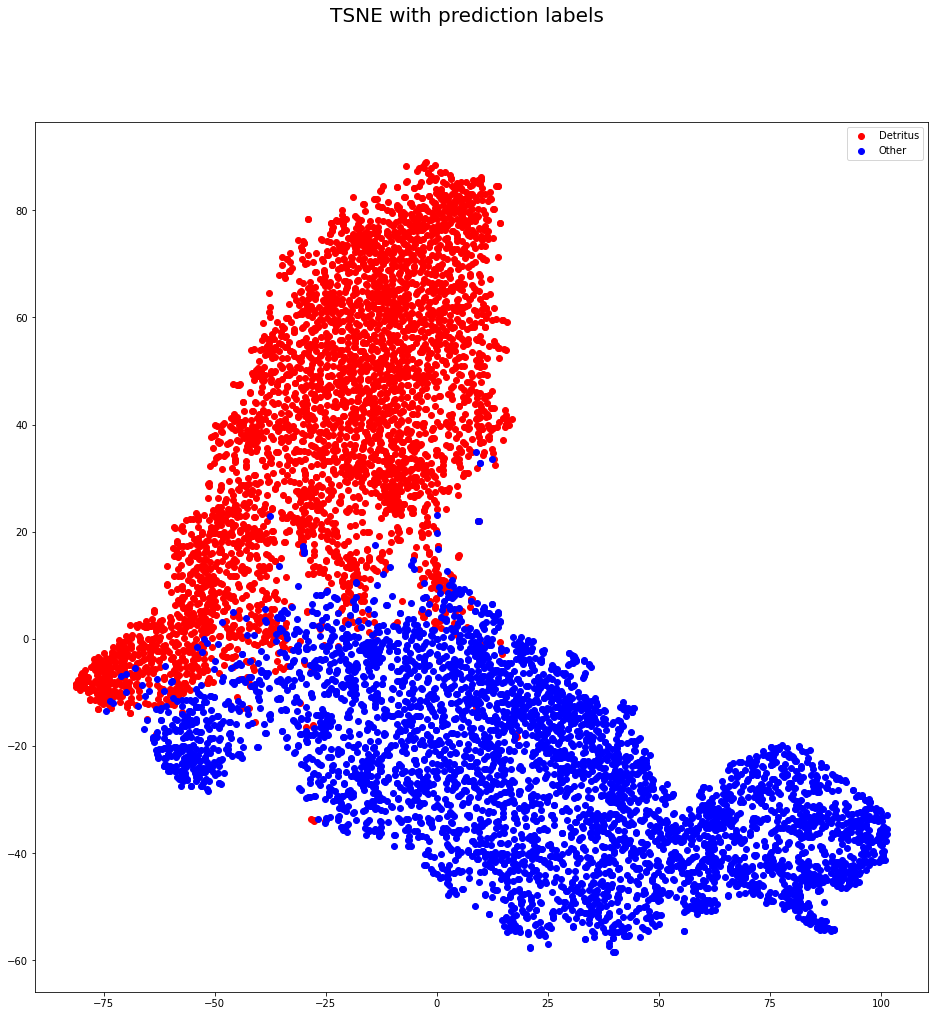

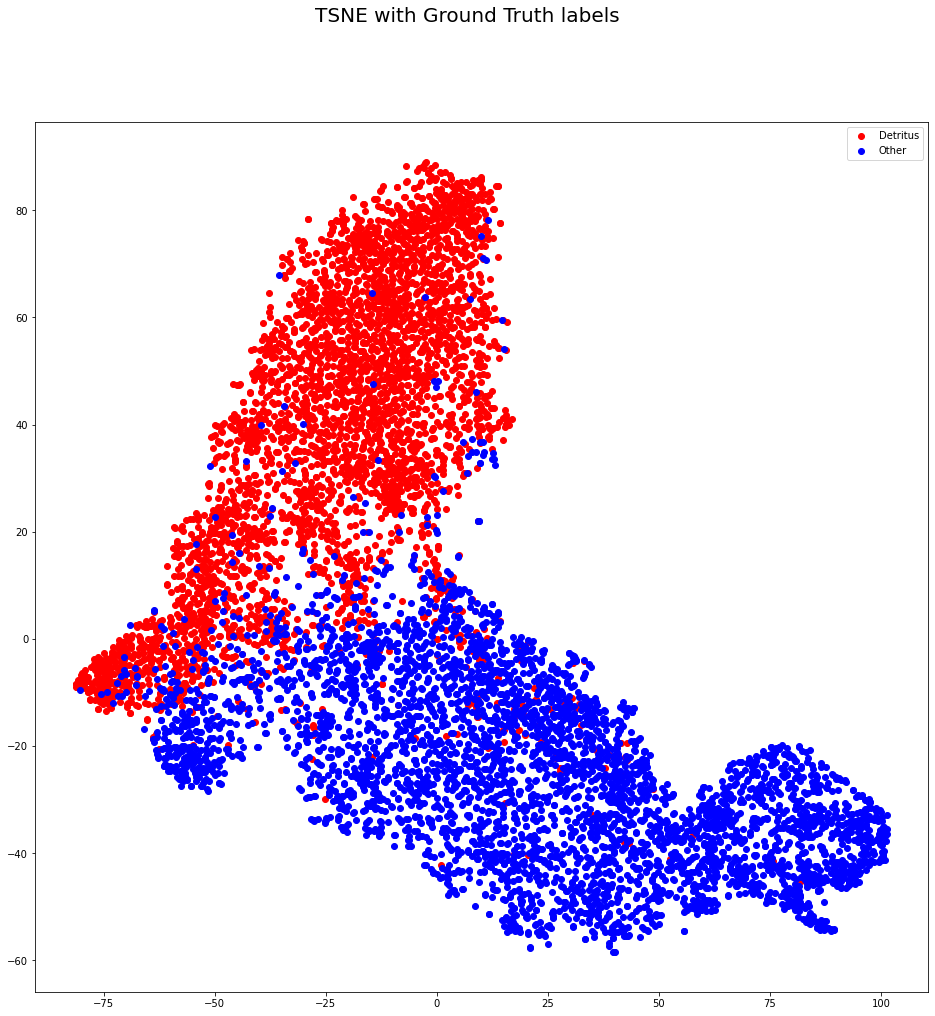

In [10]:
model_B = get_model_B(0.0, True, 0.0)

lr = 0.001
model_B.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_B.load_weights('.model_b')

test_accuracy(model_B, test_dataset)
print_tsne(model_B, test_dataset, 2500)


In [12]:
def get_mobile_net(drop_value=0.0, data_aug=False, l2_reg=0.0):
    inputs = tf.keras.Input(shape=(160, 160, 3))
    
    if data_aug:
        dag = data_augmentation(inputs)
        processed_input =  tf.keras.applications.mobilenet_v2.preprocess_input(dag)
    else:
        processed_input =  tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
    
    base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights=None)
    
    x = base_model(processed_input)
    
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    
    x = global_average_layer(x)
    
    if drop_value > 0:
        x = keras.layers.Dropout(drop_value)(x)
    
    if l2_reg > 0:
        x = keras.layers.Dense(1, kernel_regularizer=regularizers.l2(l2_reg),
                bias_regularizer=regularizers.l2(l2_reg),
                activity_regularizer=regularizers.l2(l2_reg))(x)
    else:
        x = keras.layers.Dense(1)(x)
    return keras.Model(inputs, x)

# MobileNetV2 Model From Scratch

2022-12-17 11:52:59.541242: W tensorflow/core/util/tensor_slice_reader.cc:95] Could not open .mobile_net_scratch: Data loss: file is too short to be an sstable: perhaps your file is in a different file format and you need to use a different restore operator?


258/258 [==============================] - 8s 24ms/step - loss: 0.1297 - accuracy: 0.9542
Test accuracy : 0.9541752934455872


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.012s...
[t-SNE] Computed neighbors for 8227 samples in 2.774s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 0.757673
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.993057
[t-SNE] KL divergence after 2500 iterations: 1.335778


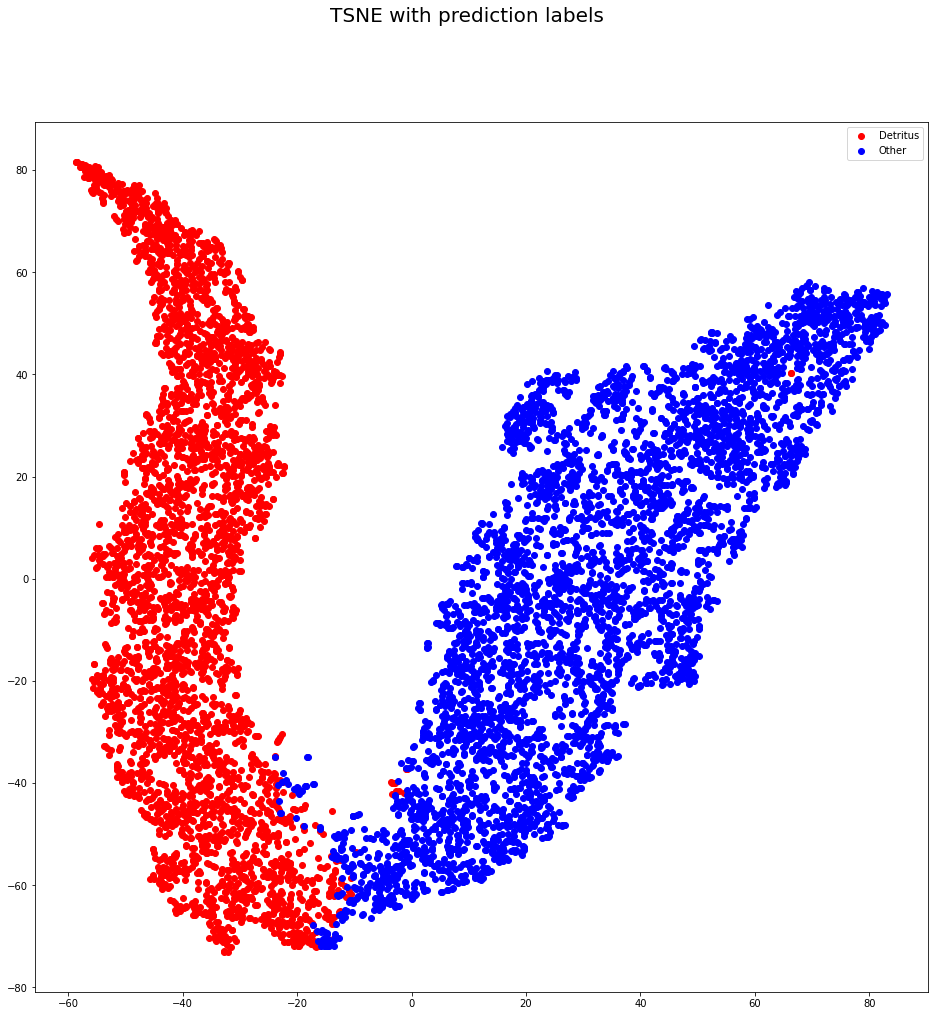

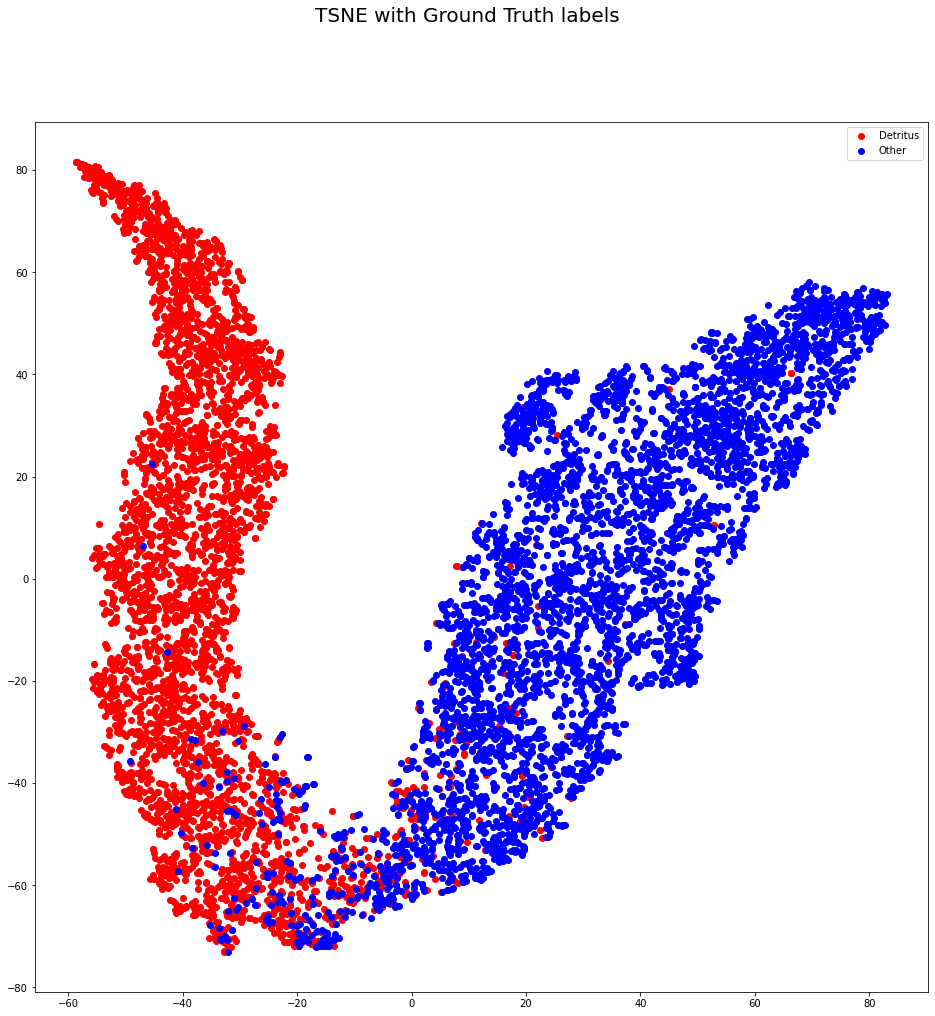

In [13]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('.mobile_net_scratch', save_best_only=True, monitor='val_loss', mode='min')

lr = 0.0001
mobileNetModelSc = get_mobile_net(0.0, True, 0.0)
mobileNetModelSc.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

mobileNetModelSc.load_weights('.mobile_net_scratch')

test_accuracy(mobileNetModelSc, test_dataset)
print_tsne(mobileNetModelSc, test_dataset, 2500)

# DenseNet model

In [14]:
def get_dense_net(drop_value=0.0, data_aug=False, l2_reg=0.0):
    dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                                   include_top=False,
                                                   weights='imagenet')

    dense_base_model.trainable = False

    dense_preprocess_input = tf.keras.applications.densenet.preprocess_input
    dense_global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    dense_prediction_layer = tf.keras.layers.Dense(1)

    dense_inputs = tf.keras.Input(shape=(160, 160, 3))
    if data_aug:
        dag = data_augmentation(dense_inputs)
        dense_x =  tf.keras.applications.densenet.preprocess_input(dag)
    else:
        dense_x =  tf.keras.applications.densenet.preprocess_input(dense_inputs)
    dense_x = dense_base_model(dense_x, training=False)
    dense_x = dense_global_average_layer(dense_x)
    if drop_value > 0:
        dense_x = keras.layers.Dropout(drop_value)(dense_x)
    dense_outputs = dense_prediction_layer(dense_x)
    dense_model = tf.keras.Model(dense_inputs, dense_outputs)
    return dense_base_model, dense_model

2022-12-17 11:59:57.431135: W tensorflow/core/util/tensor_slice_reader.cc:95] Could not open .dense_net_ft: Data loss: file is too short to be an sstable: perhaps your file is in a different file format and you need to use a different restore operator?


258/258 [==============================] - 22s 64ms/step - loss: 0.1686 - accuracy: 0.9296
Test accuracy : 0.9296219944953918


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.020s...
[t-SNE] Computed neighbors for 8227 samples in 2.550s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 5.908279
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.969643
[t-SNE] KL divergence after 2500 iterations: 2.118689


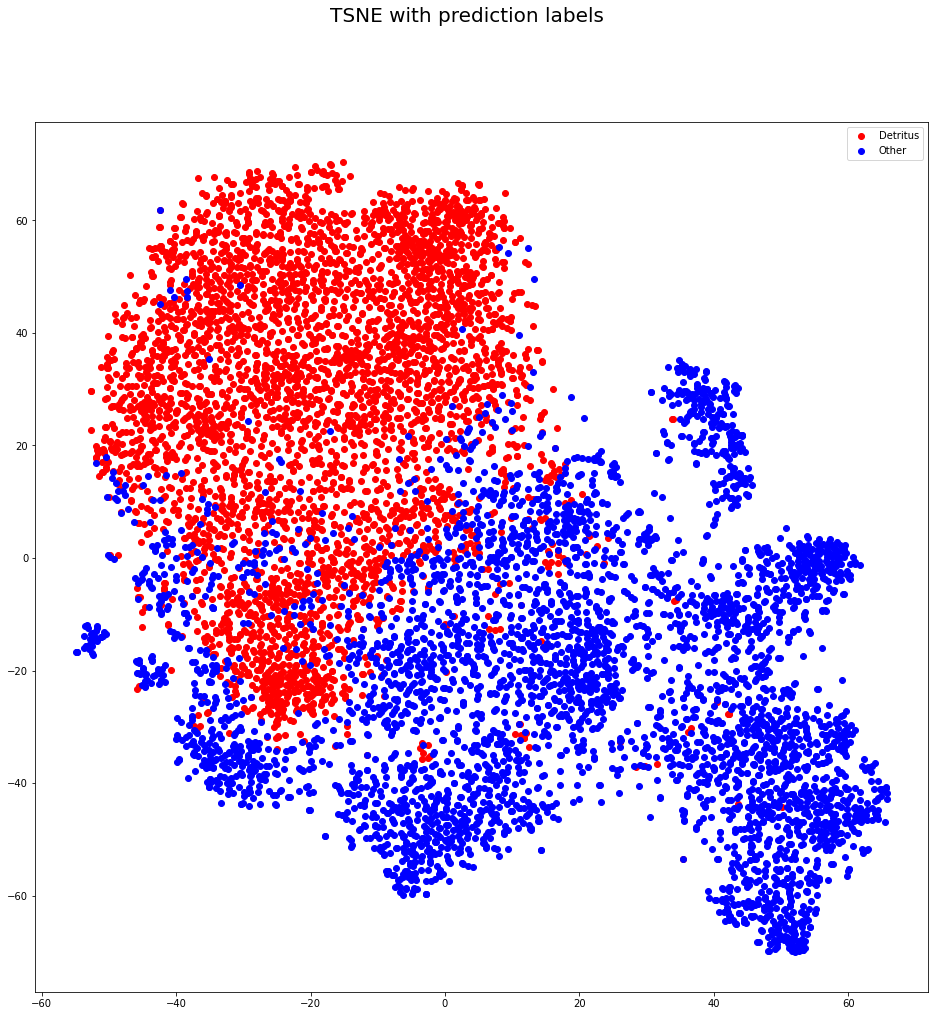

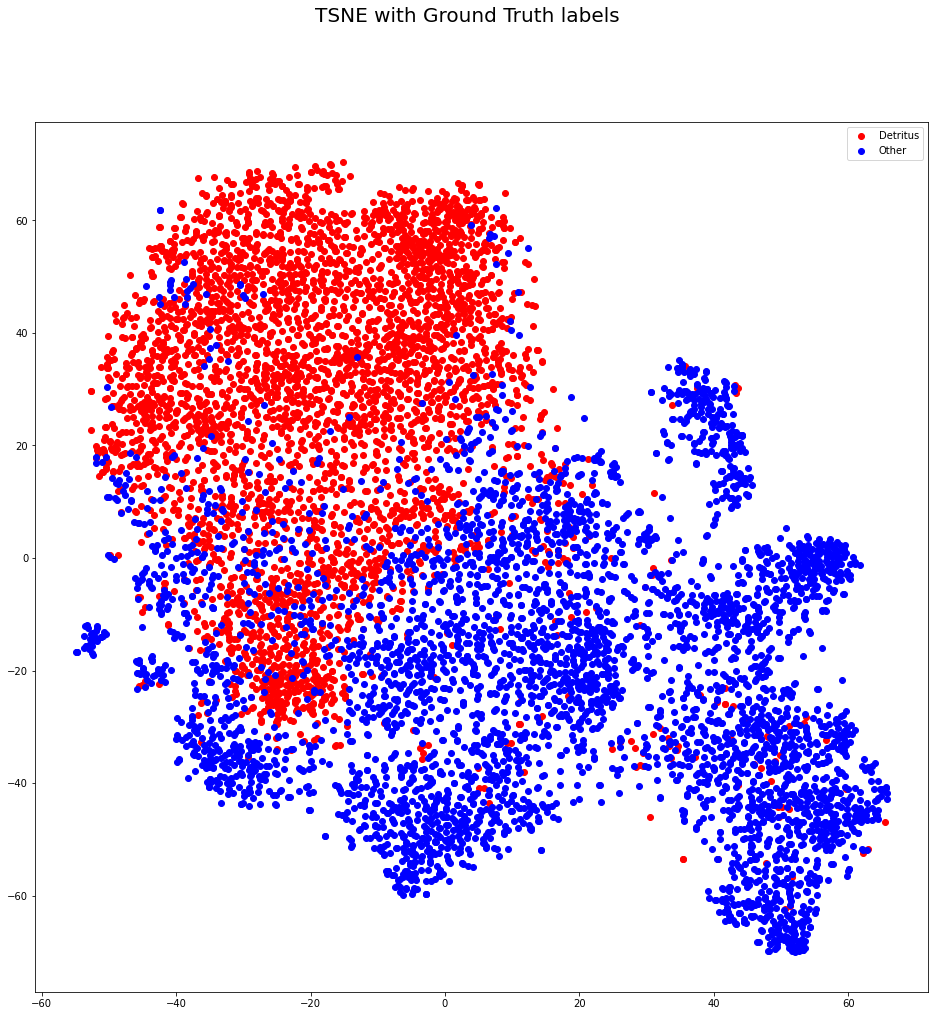

In [17]:
_, dense_model = get_dense_net(0.0, True, 0.0)

dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

dense_model.load_weights('.dense_net_ft')

loss, accuracy = dense_model.evaluate(test_dataset)
print('Test accuracy :', accuracy)
    
print_tsne(dense_model, test_dataset, 2500)

In [19]:
import os
from shutil import copyfile

def get_class_name(subdir):
    return subdir[subdir[:subdir.rfind("/")].rfind("/")+1:subdir.rfind('/')]

def get_file_name(subdir):
    return subdir[subdir.rfind('/')+1:]

def copy_results(files, tenancy, result):
    for file in files:
        class_name = get_class_name(file)
        file_name = get_file_name(file)
          
        if not os.path.exists(os.path.join(os.getcwd(), final_dir)):
            os.makedirs(os.path.join(os.getcwd(), final_dir), exist_ok=True)
        copyfile(file, final_dir + "/"+file_name)
    
def process_results(correct_files, incorrect_files, tenancy):
    copy_results(correct_files, tenancy, "correct")
    copy_results(incorrect_files, tenancy, "incorrect")